<a href="https://colab.research.google.com/github/hamagami/is2024/blob/main/is03_FisherAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fisher analysis

This code solves Fisher's discriminant problem. In general, when we refer to LDA (Linear Discriminant Analysis), it often refers to this algorithm. Here, we create two Gaussian-distributed classes in a two-dimensional plane, and for each class, we aim to "minimize within-class variance" and "maximize between-class variance." We maximize this ratio. Although the solution involves solving first-order equations through partial derivatives, in this case, we are solving it using the numpy linalg library.

In [ ]:
!pip install numpy matplotlib seaborn scikit-learn


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

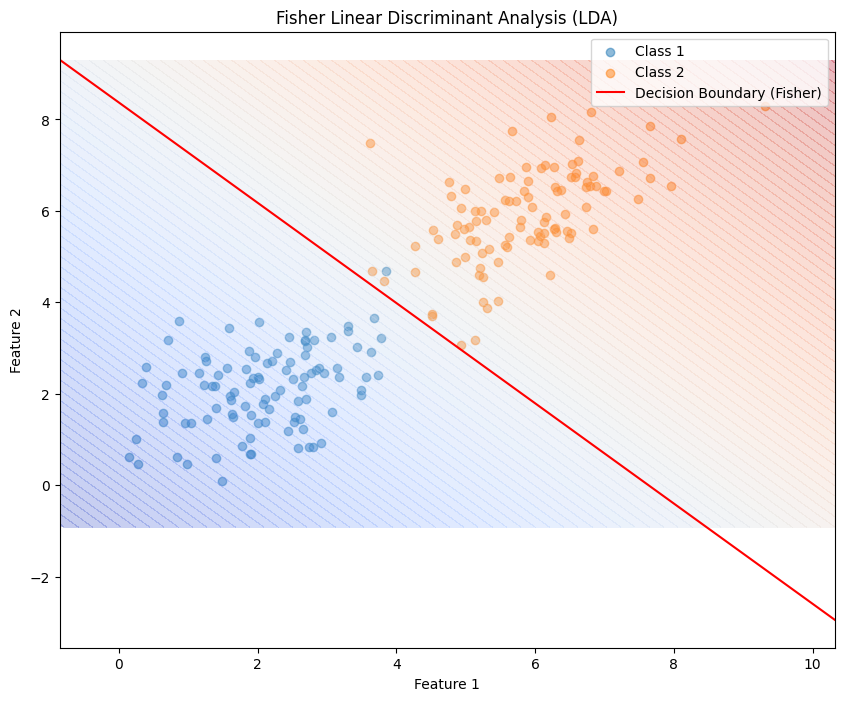

In [ ]:
# Data generation (Class data following two normal distributions)
np.random.seed(42)
mean1 = [2, 2]
mean2 = [6, 6]
cov = [[1, 0.5], [0.5, 1]]

# Data for Class 1
class1 = np.random.multivariate_normal(mean1, cov, 100)
# Data for Class 2
class2 = np.random.multivariate_normal(mean2, cov, 100)

# Calculate the mean vector of Class 1 and Class 2
mean1_vec = np.mean(class1, axis=0)
mean2_vec = np.mean(class2, axis=0)

# Calculate the covariance matrices of Class 1 and Class 2
cov1 = np.cov(class1, rowvar=False)
cov2 = np.cov(class2, rowvar=False)

# Sum of the covariance matrices (within-class scatter matrix)
S_w = cov1 + cov2

# Fisher's discriminant weights (w = S_w^-1 * (mean2 - mean1))
w = np.linalg.inv(S_w).dot(mean2_vec - mean1_vec)

# Threshold for decision boundary (based on the midpoint between the class means)
threshold = 0.5 * (mean1_vec + mean2_vec).dot(w)

# Plot scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(class1[:, 0], class1[:, 1], label='Class 1', alpha=0.5)
plt.scatter(class2[:, 0], class2[:, 1], label='Class 2', alpha=0.5)

# Plot decision boundary
x_vals = np.linspace(min(np.vstack((class1, class2))[:, 0]) - 1,
                     max(np.vstack((class1, class2))[:, 0]) + 1, 100)
y_vals = (threshold - w[0] * x_vals) / w[1]
plt.plot(x_vals, y_vals, label='Decision Boundary (Fisher)', color='red')

# Data for the heatmap
xx, yy = np.meshgrid(np.linspace(min(np.vstack((class1, class2))[:, 0]) - 1,
                                 max(np.vstack((class1, class2))[:, 0]) + 1, 100),
                     np.linspace(min(np.vstack((class1, class2))[:, 1]) - 1,
                                 max(np.vstack((class1, class2))[:, 1]) + 1, 100))

grid = np.c_[xx.ravel(), yy.ravel()]
Z = np.dot(grid, w) - threshold
Z = Z.reshape(xx.shape)

# Plot heatmap
plt.contourf(xx, yy, Z, levels=100, cmap='coolwarm', alpha=0.3)

# Graph settings
plt.title('Fisher Linear Discriminant Analysis (LDA)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
